In [5]:
import mylibraries.IMFs as imfs
import numpy as np 
import matplotlib.pyplot as plt
import os 
import sys
import pandas as pd
from scipy.interpolate import CubicSpline
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import interpolate
from scipy import stats

In [6]:
#df=pd.read_csv("/home/mattia/codes/evo_traks/tables_grids2011/Z014/M500Z14V0.dat", header=0, skiprows=[1,2], delim_whitespace=True)
#print(df.columns)
print(np.get_printoptions())
np.set_printoptions(threshold=100000)

{'edgeitems': 3, 'threshold': 100000, 'floatmode': 'maxprec', 'precision': 8, 'suppress': False, 'linewidth': 75, 'nanstr': 'nan', 'infstr': 'inf', 'sign': '-', 'formatter': None, 'legacy': False}


In [7]:
lista=os.listdir("/home/mattia/codes/evo_traks/tables_grids2011/Z014")
#print(lista)
mass_ini=[]
namelist=[]
for indx,name in enumerate(lista):
    lista[indx]=name.replace("p", ".")
    name_=lista[indx]
    vel=int(name_[len(name_)-5])
    if (vel==4):##only with rotation
    #    name_=lista[indx]
        namelist+=[name]
        mass_=float(name_[1:4])
        #print(1, lista[indx],float(mass_) )
        mass_ini+=[mass_]
mass_ini=np.array(mass_ini)
namelist=np.array(namelist)
p=np.argsort(mass_ini)
mass_ini=mass_ini[p]
namelist=namelist[p]
print(mass_ini, namelist)


[  0.8   0.9   1.    1.1   1.2   1.3   1.5   1.7   2.    2.5   3.    4.
   5.    7.    9.   12.   15.   20.   25.   32.   40.   60.   85.  120. ] ['M0p8Z14V4.dat' 'M0p9Z14V4.dat' 'M001Z14V4.dat' 'M1p1Z14V4.dat'
 'M1p25Z14V4.dat' 'M1p35Z14V4.dat' 'M1p5Z14V4.dat' 'M1p7Z14V4.dat'
 'M002Z14V4.dat' 'M2p5Z14V4.dat' 'M003Z14V4.dat' 'M004Z14V4.dat'
 'M005Z14V4.dat' 'M007Z14V4.dat' 'M009Z14V4.dat' 'M012Z14V4.dat'
 'M015Z14V4.dat' 'M020Z14V4.dat' 'M025Z14V4.dat' 'M032Z14V4.dat'
 'M040Z14V4.dat' 'M060Z14V4.dat' 'M085Z14V4.dat' 'M120Z14V4.dat']


/home/mattia/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mattia/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mattia/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mattia/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mattia/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mattia/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: R

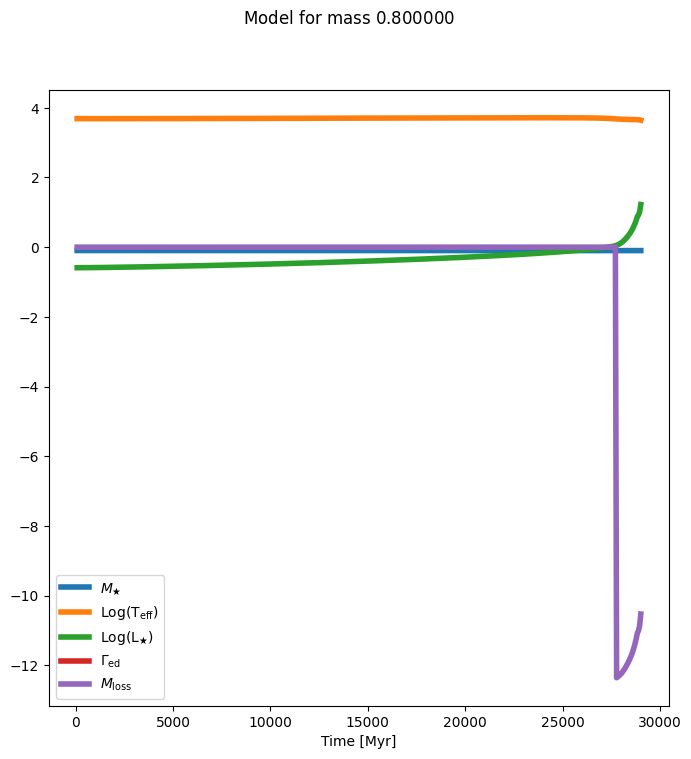

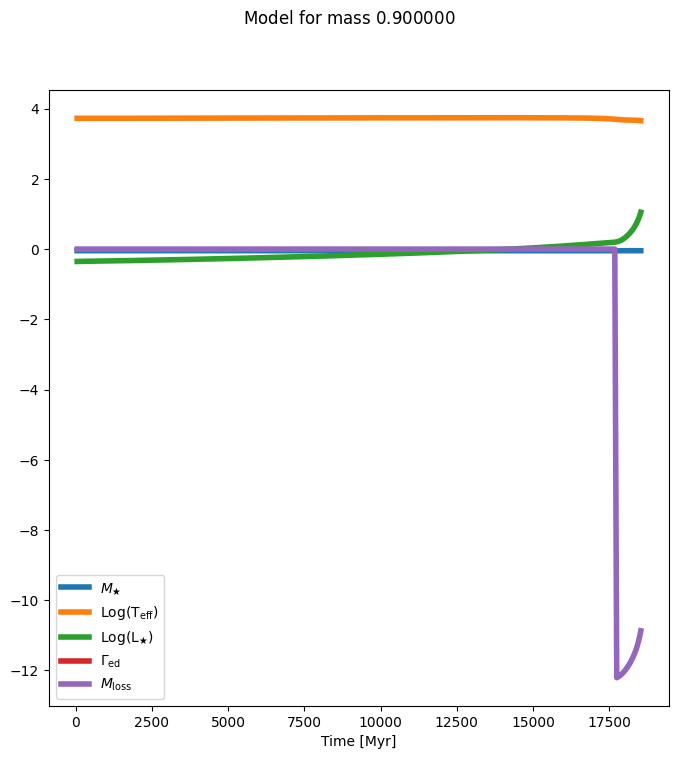

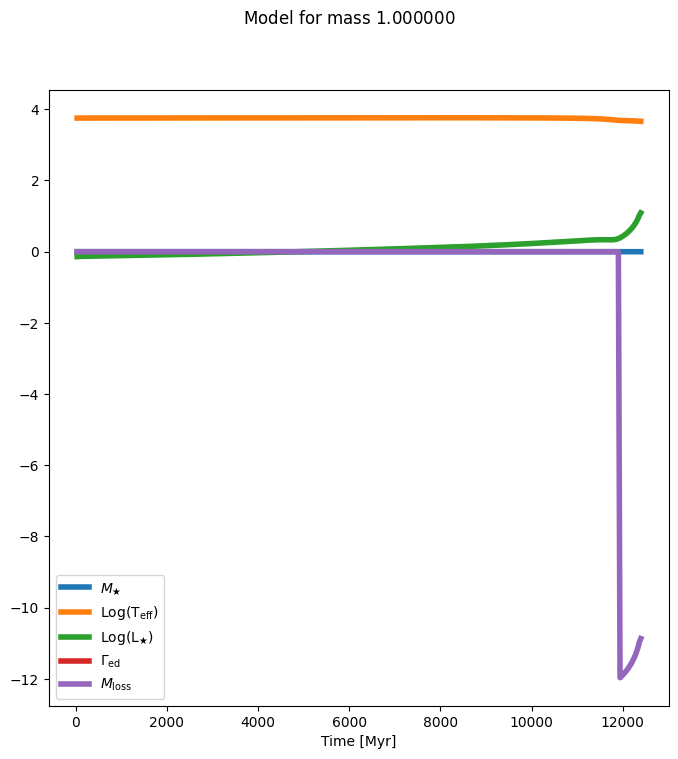

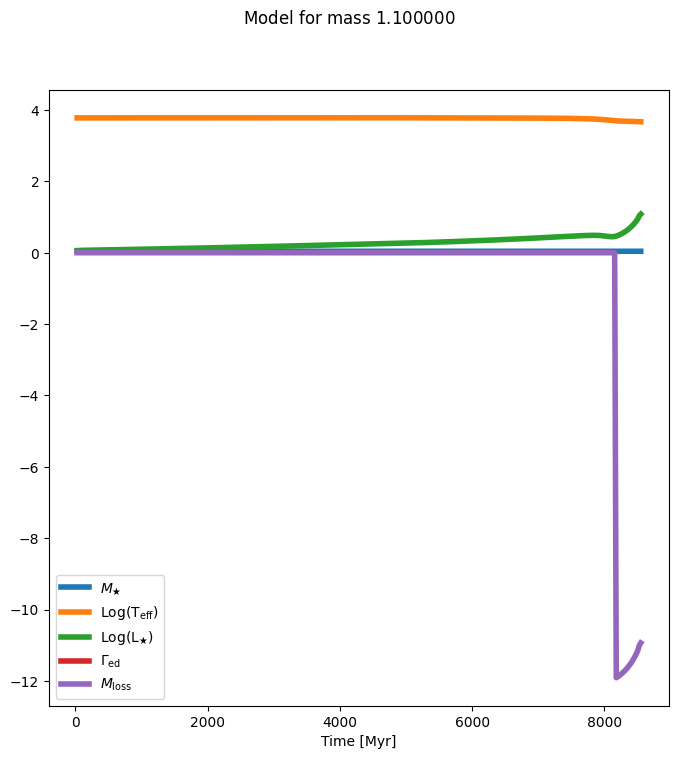

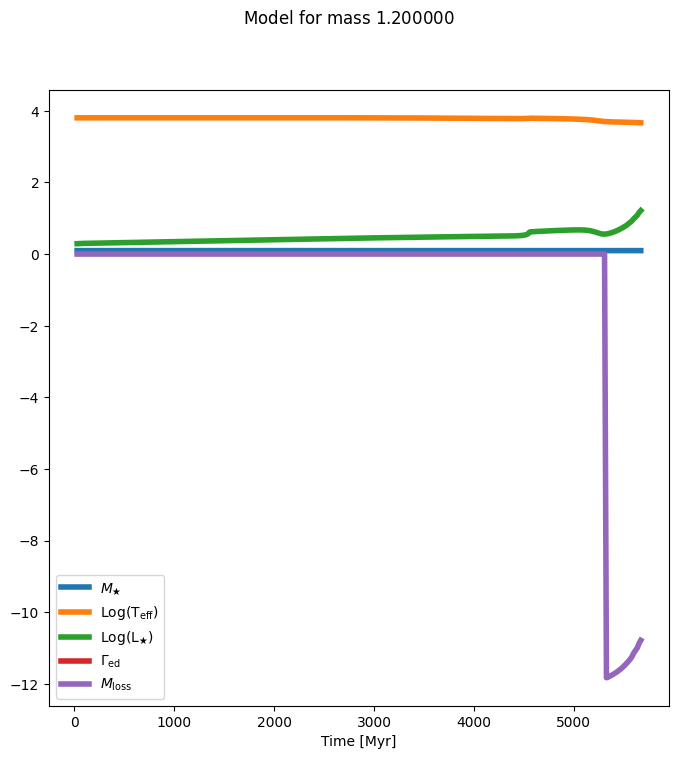

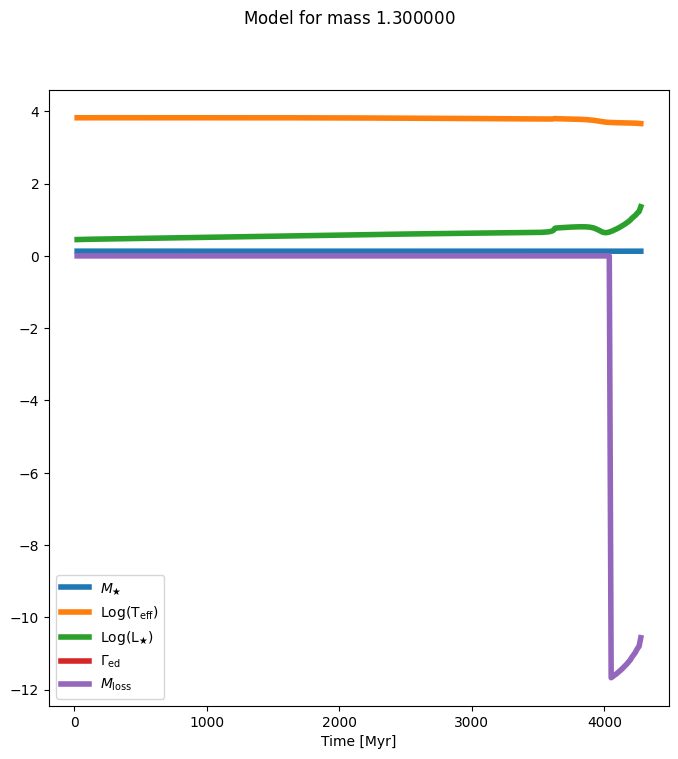

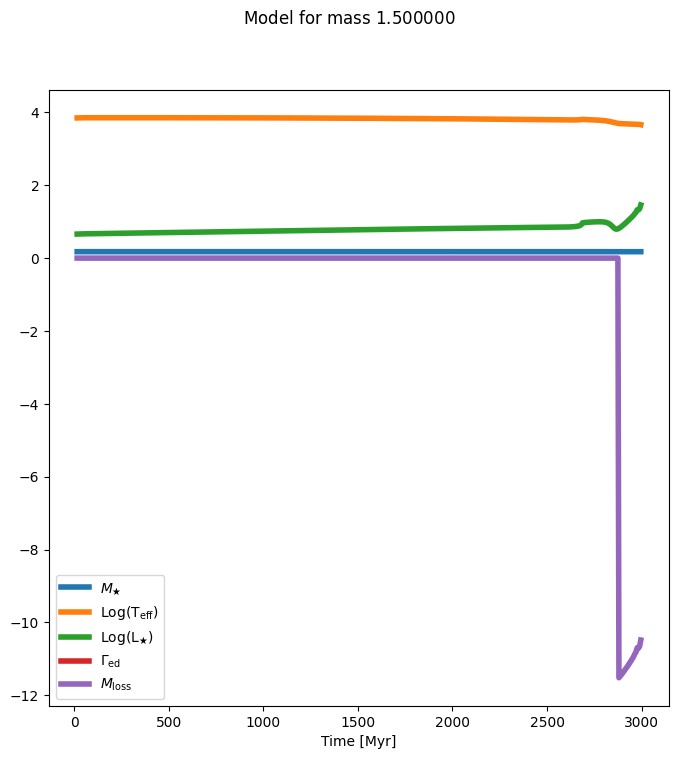

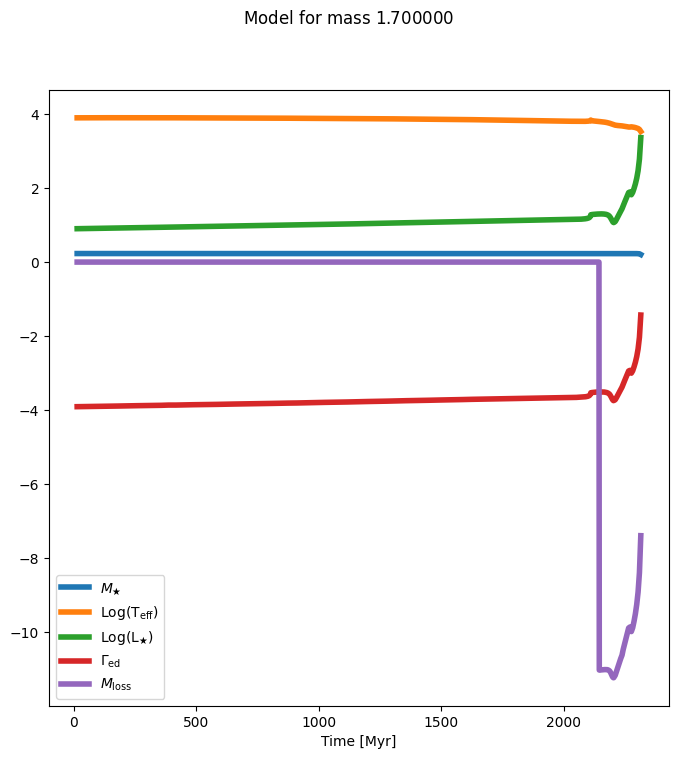

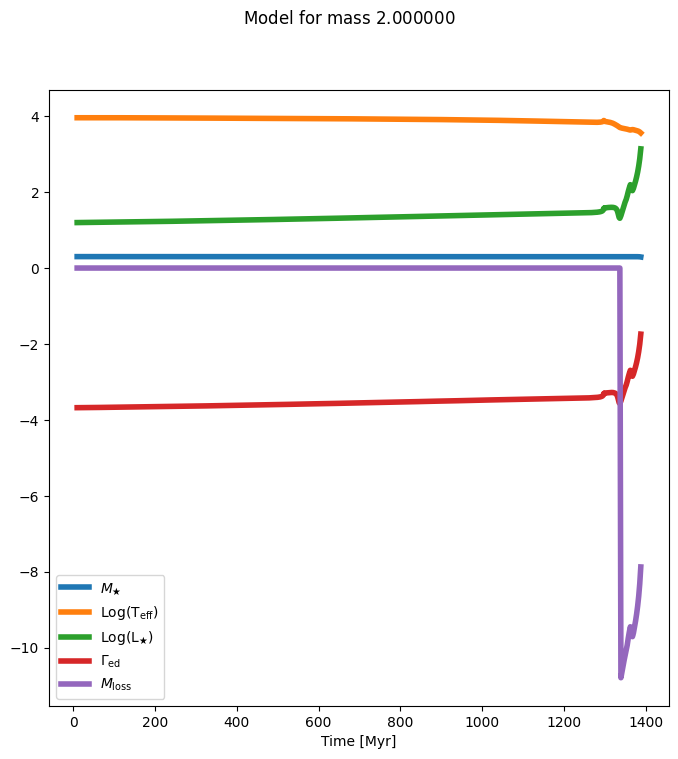

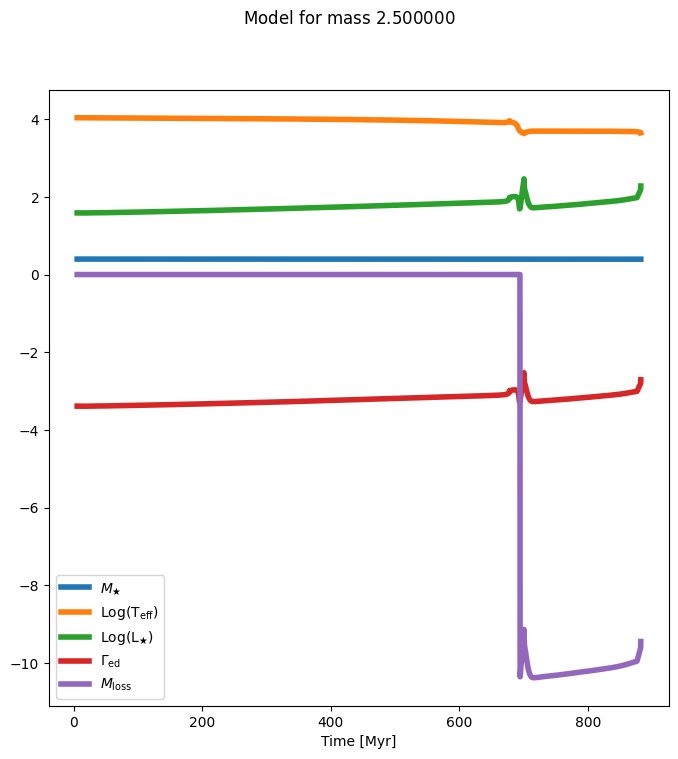

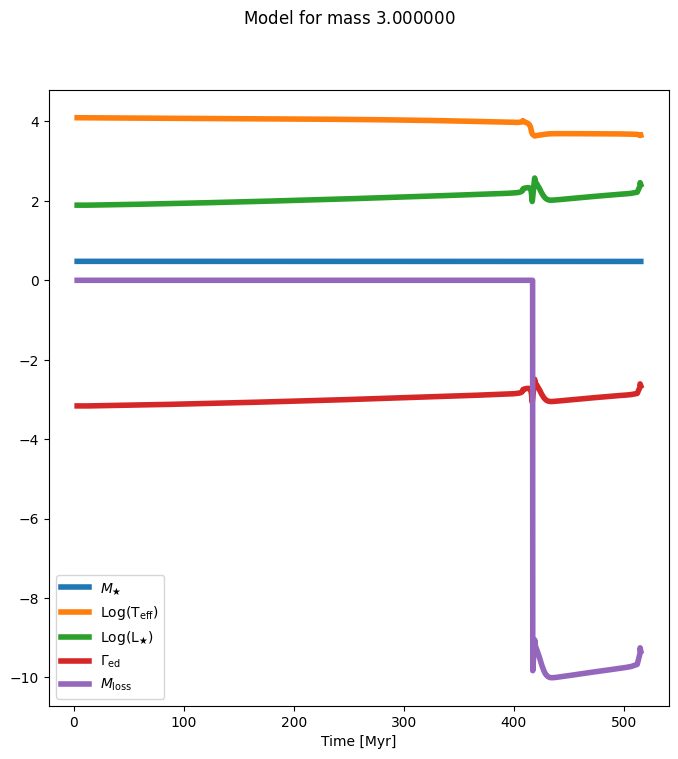

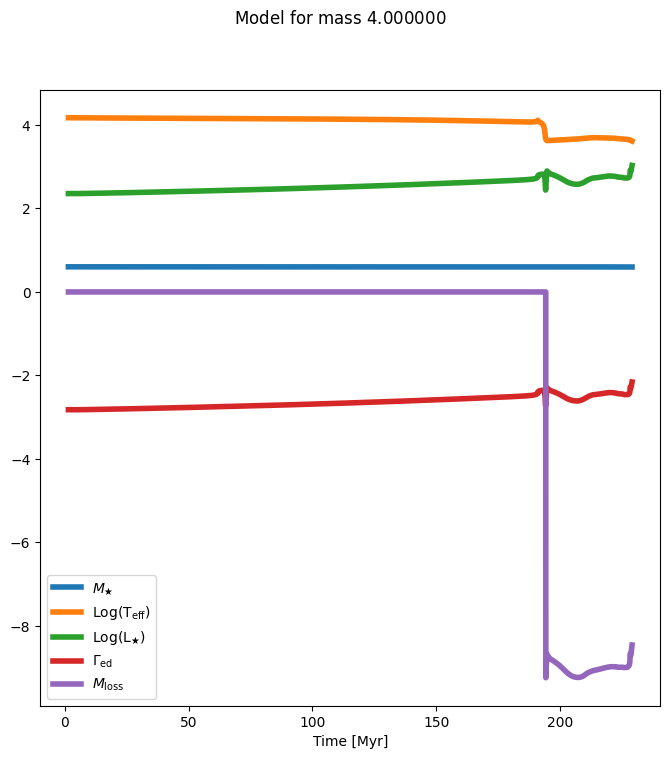

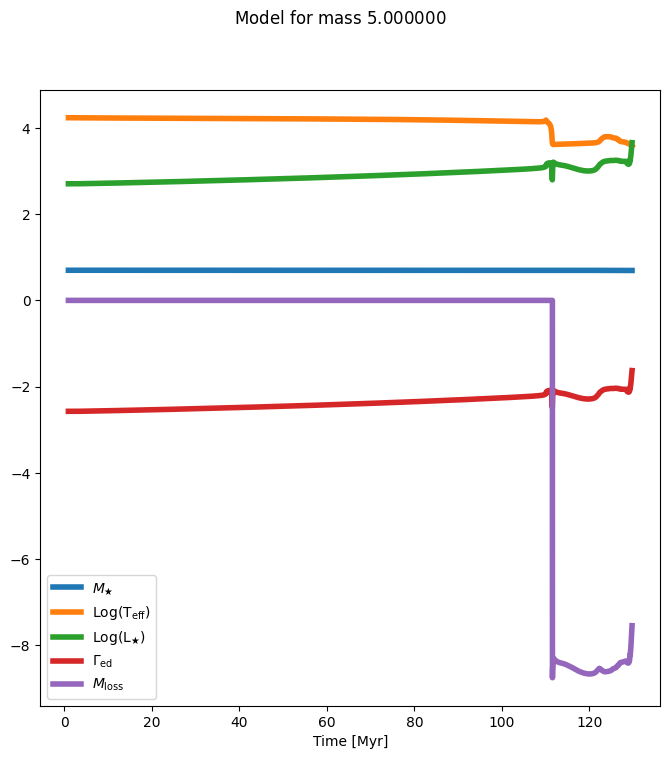

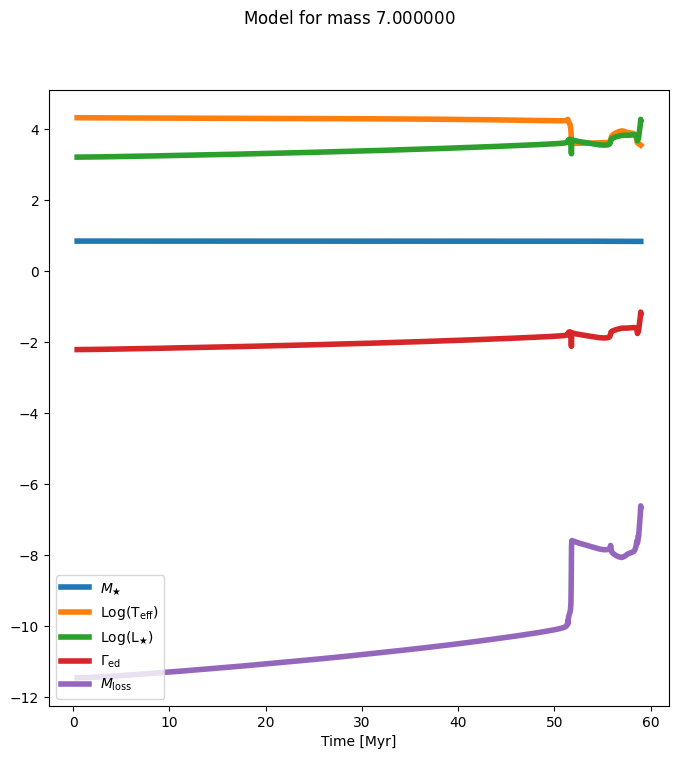

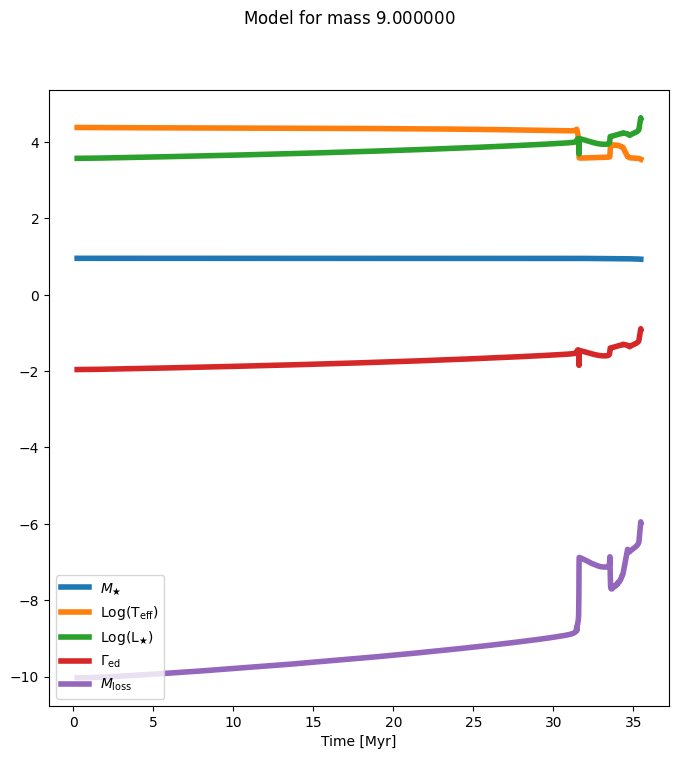

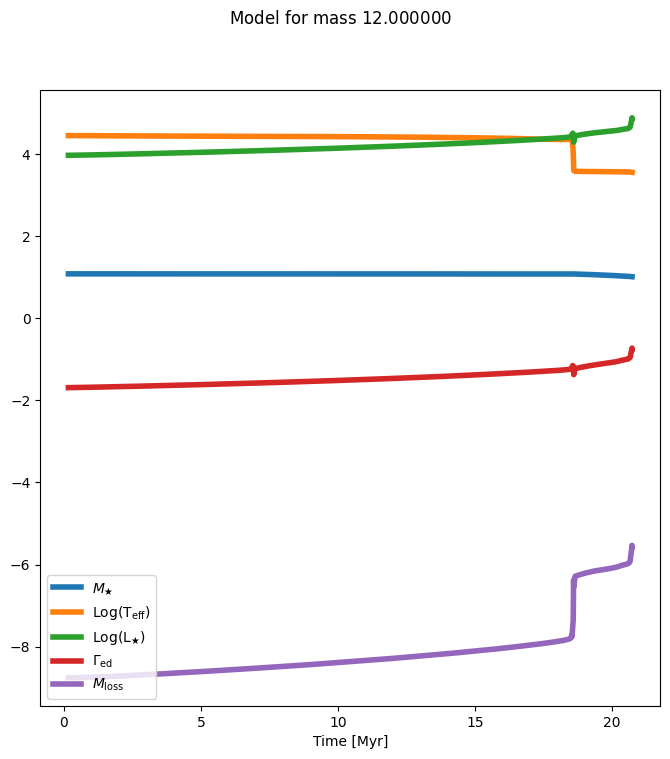

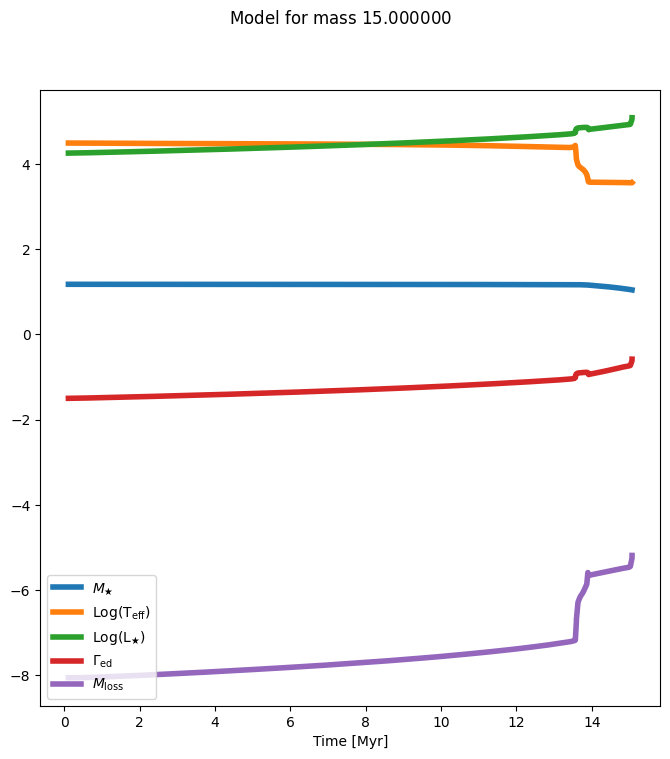

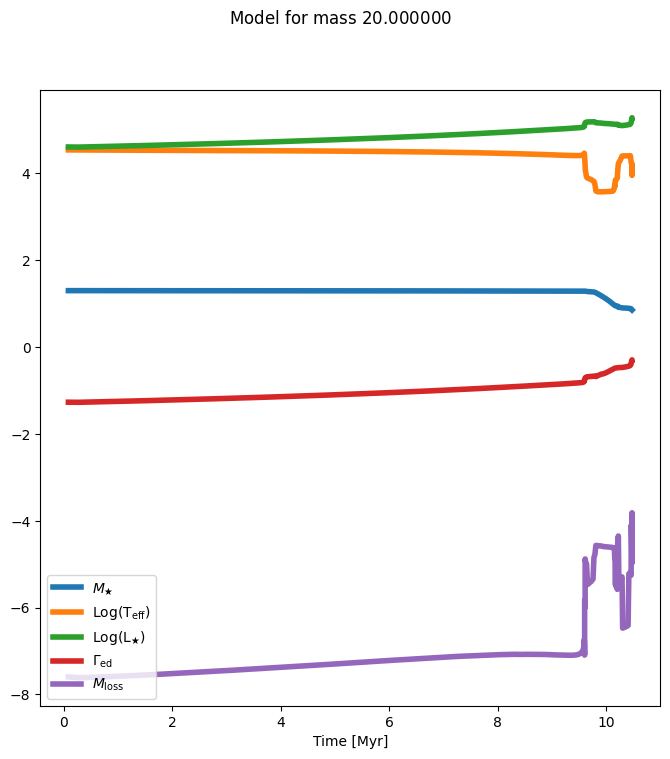

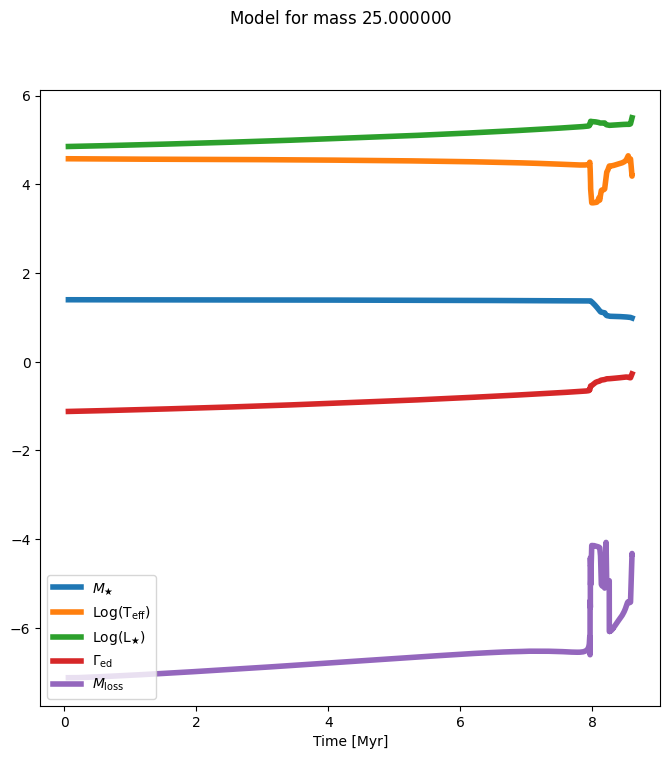

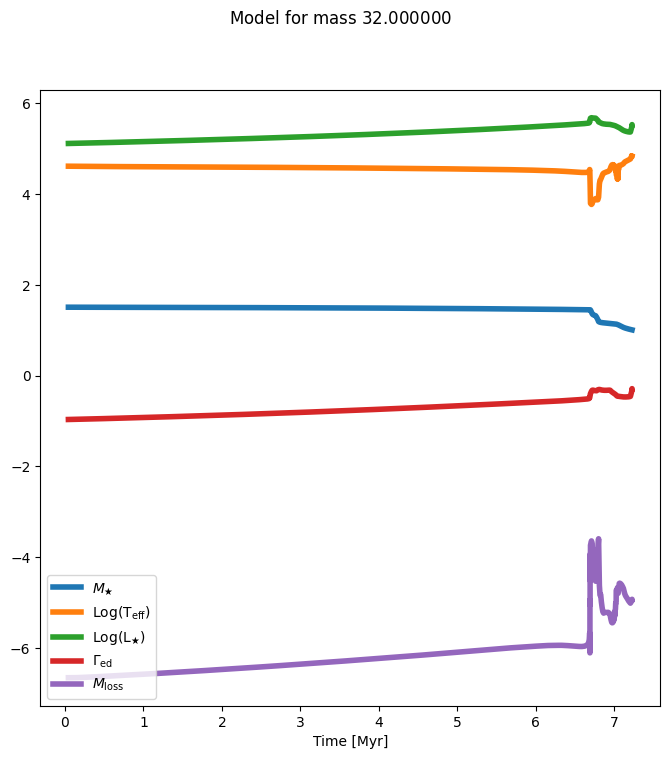

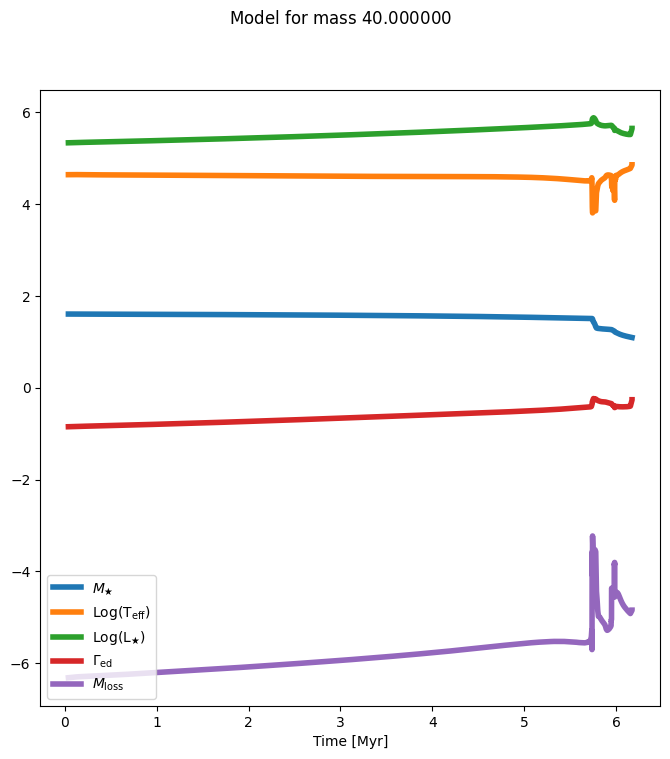

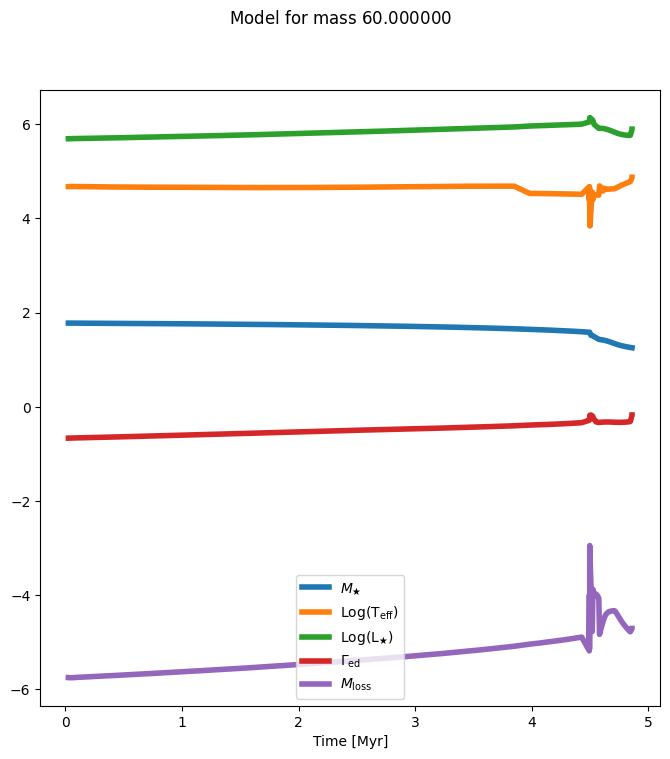

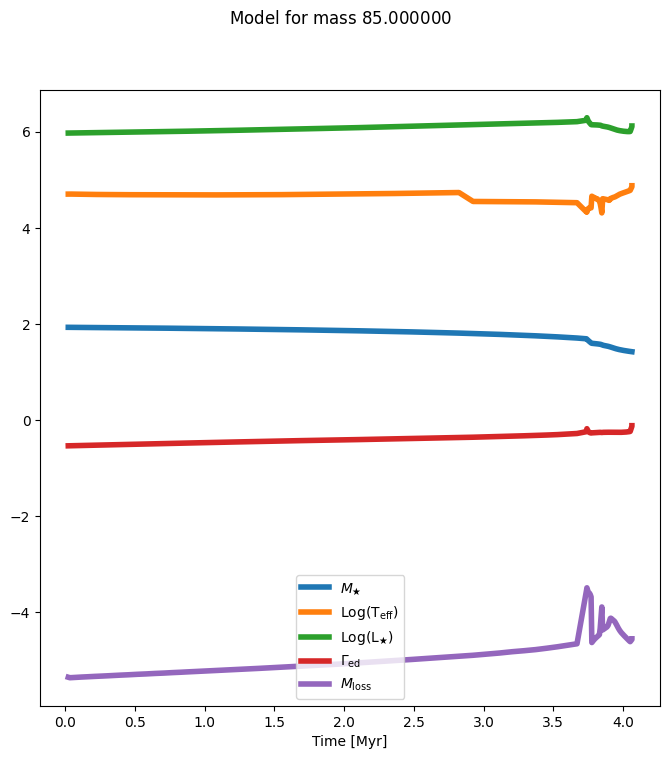

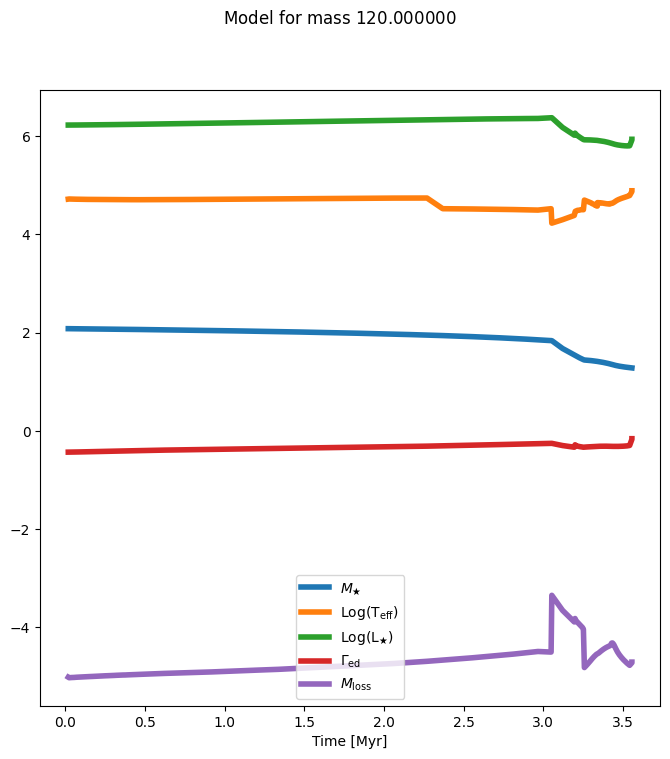

In [16]:
def temp(time_):
                    #t_=poly[0]*m**(4)+poly[1]*m**(3)+poly[2]*m**(2)+poly[3]*m**(1)+poly[4]*m**(0)
                    t_=0
                    for indx, pol in enumerate(poly):
                        t_+=pol*time_**(len(poly)-1-indx)
                        #print(t_,pol, len(poly)-1-indx)
                    return t_
                #ax.plot(data["time"], np.log10(temp(data["time"])), label=i)
deg=4
outfilename="./STELLAR_EVO_TABLE_polyfit.txt"
if os.path.exists(outfilename): os.system("rm "+outfilename)
#with open(outfilename, "a") as f:
#        f.write("The convention is p(x) = p[0] * x**deg + ... + p[deg]. %s deg used. \n\n\n\n\n" %deg)


start=0
end=len(namelist)-1#15
plot=True


for indx0,filename in enumerate(namelist):

    if indx0>=start and indx0<=end:   
        #print("models(%i)=%f; models_indx(%i)=%i" %(indx0+1, mass_ini[indx0],indx0+1,indx0+1))
        if plot:
            fig=plt.figure(figsize=(8,8))
            ax=plt.subplot()
        N=6
        s=4
        rescaling=400
        data=pd.read_csv("/home/mattia/codes/evo_traks/tables_grids2011/Z014/"+filename, header=0, skiprows=[1,2], delim_whitespace=True)
        time=np.float64(data["time"])
        #mass=np.float64(data["mass"])
        #log_teff=np.float64(data["lg(Teff)"])
        #log_lum=np.float64(data["lg(L)"])
        #massloss_rate=np.float64(data["lg(Md)"])

        names=["mass", "lg(Teff)","lg(L)","Gamma_Ed","lg(Md)"]
        labels=[r"$M_\bigstar$", r"$\rm Log(T_{\rm eff})$", r"$\rm Log(L_\bigstar/L_\odot)$", r"$\Gamma_{\rm ed}$", r"$M_{\rm loss}$"]
        deg=1
        
        with open(outfilename, "a") as fi:
            #fi.write("Model for initial mass %f\n"%mass_ini[indx0])#"The convention is p(x) = p[0] * x**deg + ... + p[deg]. %s deg used. \n" %deg)

            if indx0==start:
                 fi.write("subroutine choose_model(m_model, tt, mass, teff, lum,mdot, gamma_ed)\n\
    use amr_commons, only: dp\n\
    implicit none\n\
    real(dp):: tt\n\
    integer::m_model\n\
    real(dp)::mass, teff, lum, mdot, gamma_ed\n\n\
IF ( m_model == %i  ) THEN !!for mass %f\n"%(indx0+1, mass_ini[indx0]) )
            elif indx0>start and indx0<= end:
                 fi.write("ELSE IF ( m_model == %i  ) THEN !!for mass %f\n"%(indx0+1, mass_ini[indx0]) )
            #elif indx0==end:
            #     fi.write("ELSE IF ( m_initial .GT. %f .AND. m_initial .LE. %f  ) THEN \n"%(mass_ini[indx0], mass_ini[indx0+1]) )
            
            masssplines=[]
            teffsplines=[]
            lumsplines= []
            mdotsplines=[]
            gammasplines=[]
            for indx,i in enumerate(names):
                #header="\n ## relations: %s - %s  \n" %("time", names[indx]) 
                #fi.write(header)
                
                data_tofit=data[i]
                u, c = np.unique(time, return_index=True)
                #time=time[c]
                #data_tofit=data_tofit[c]
                #if i!="mass":
                    
                    #cs=CubicSpline(time, data_tofit) 

                #elif i=="mass":
                    #m,q=np.polyfit(time,data_tofit, deg=deg)
                    #cs=CubicSpline(time, np.log10(data_tofit))

                #print(data_tofit)
                #break
                import warnings
                warnings.simplefilter('ignore', np.RankWarning)

                for j in range(time.size-1):
                    #try:
                    #    knots=np.array([time[j],time[j+1],time[j+2]])
                    #    knotsy=np.array([data_tofit[j],data_tofit[j+1],data_tofit[j+2]])
                    #except:
                    knots=np.array([time[j],time[j+1]])
                    knotsy=np.array([data_tofit[j],data_tofit[j+1]])
                    if i!="mass":
                        m,q=np.polyfit(knots, knotsy,deg=1)

                    elif i=="mass":
                        m,q=np.polyfit(knots, np.log10(knotsy),deg=1)
                    #print(data_tofit[j],data_tofit[j+1])   
                    if indx==0:
                        
                        cut=20
                        a0 = q#round(newcs.c.item(3,j),8)
                        b0 = m#round(newcs.c.item(2,j),8)
                        c0 = 0#round(newcs.c.item(1,j),8)
                        d0 = 0#round(newcs.c.item(0,j),8)
                        #if j==time.size-2: print(m*time.max()+q, m, q)
                        if j==0 :
                             masssplines+= [("  IF (tt .LE. %+.9f) THEN \n     mass=%+.9f;"%(knots[1],np.log10(knotsy[0])))]
                        elif j< time.size-2 and j!=0:
                           masssplines+= [( "  ELSE IF ( tt .GT.%+.9f .AND. tt .LE. %+.9f) THEN \n   mass=%+.9f %+.9f*tt;"%(knots[0],knots[1],a0,b0))]
                        else:
                            masssplines+= [( "  ELSE IF ( tt .GT.%+.9f) THEN \n     mass=%+.9f;"%(knots[1],np.log10(knotsy[1])))]
                            
                        #value=10**(q)
                        #if value>1e3:
                            #print( value, j, mass_ini[indx0],knots/1e6, knotsy, np.log10(knotsy) )
                    if indx==1:
                        a1 = q#round(newcs.c.item(3,j),8)
                        b1 = m#round(newcs.c.item(2,j),8)
                        c1 = 0#round(newcs.c.item(1,j),8)
                        d1 = 0#round(newcs.c.item(0,j),8)
                        #fi.write
                        if j==0 :
                            teffsplines+=[( "teff=%+.9f\n " %(knotsy[0]))]
                        elif j== time.size-2:
                            teffsplines+=[( "teff=%+.9f\n " %(knotsy[1]))]
                        else:
                            teffsplines+=[( "teff=%+.9f %+.9f*tt\n " %(a1,b1))]
                    if indx==2:
                        a2 = q#round(newcs.c.item(3,j),8)
                        b2 = m#round(newcs.c.item(2,j),8)
                        c2 = 0#round(newcs.c.item(1,j),8)
                        d2 = 0#round(newcs.c.item(0,j),8)
                        #fi.write
                        if j==0:
                            lumsplines+=[( " lum =%+.9f;" %(knotsy[0]))]
                        elif j== time.size-2:
                            lumsplines+=[( " lum =%+.9f;" %(knotsy[1]))]
                        else:
                            lumsplines+=[( " lum =%+.9f %+.9f*tt;" %(a2,b2))]
                    if indx==3:
                        a3 = q#round(newcs.c.item(3,j),8)
                        b3 =m#round(newcs.c.item(2,j),8)
                        c3 = 0#round(newcs.c.item(1,j),8)
                        d3 = 0#round(newcs.c.item(0,j),8)
                        if j==0:
                            gammasplines+=[( "gamma_ed =%+.9f;" %(knotsy[0]))]
                        elif j== time.size-2:
                            gammasplines+=[( "gamma_ed =%+.9f;" %(knotsy[1]))]
                        else:
                            gammasplines+=[( "gamma_ed =%+.9f %+.9f*tt;" %(a3,b3))]
                        

                    if indx==4:
                        a4 = q#round(newcs.c.item(3,j),8)
                        b4 = m#round(newcs.c.item(2,j),8)
                        c4 = 0#round(newcs.c.item(1,j),8)
                        d4 = 0#round(newcs.c.item(0,j),8)
                        
                        #fi.write
                        if j< time.size-2:
                            if j==0:
                             mdotsplines+=[( "mdot=%+.9f\n"%(knotsy[0]))]
                            else:
                             mdotsplines+=[( "mdot=%+.9f %+.9f*tt\n"%(a4,b4))]
                            
                        elif j==time.size-2 and indx0<end:
                            mdotsplines+=[( "mdot=%+.9f\n  ENDIF"%(knotsy[1]))]
                        elif j== time.size-2 and indx0==end:
                            mdotsplines+=[( "mdot=%+.9f\n  ENDIF \nENDIF\n\nendsubroutine choose_model"%(knotsy[1]))]
                        
            
                #for pol in poly:
                    #fi.write(str(pol)+"\n")
                #f.write("\n")
                
                
                
                #ax.scatter(newtime, (cs(newtime)), label=i, color="black", marker="+")
                if plot:
                    if i!="mass" and i!= "Gamma_Ed":
                        ax.plot(time/1e6, data_tofit, label=labels[indx], lw=s)
                        gg=1
                    elif  i== "Gamma_Ed":
                         ax.plot(time/1e6,  np.log10(data_tofit), label=labels[indx], lw=s)
                    elif i=="mass":
                        #gg=1
                    #if i=="mass":
                        ax.plot(time/1e6,  np.log10(data_tofit), label=labels[indx], lw=s)
                        
                        fig.suptitle(r"Model for mass $%f$" %mass_ini[indx0])

                    ax.legend()
                    ax.set_xlabel(r"Time [Myr]")
                    fig.savefig("Plot_model_%f.png"%mass_ini[indx0])
            #print(indx0, end)
            data_to_write = np.column_stack([masssplines,teffsplines, lumsplines, gammasplines, mdotsplines])
            np.savetxt(fi , data_to_write, fmt="%s")
